# Koneoppiminen: Tehtävä 5: Tukivektorikone  (max. 10 p)

Tukivektorikone (engl. *Support Vector Machine*, **SVM**)
* 1990-luvulla kehitetty lineaarinen luokittelumalli.

Tutki tehtävää varten myös seuraavat scikit Learn -manuaalisivut:
* [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
* [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Jere Soininen'
student_id = 'AB6802'

## Tehtävä 5.1
### Aihe: Syöpätutkimusaineisto (2 pistettä)
### Aineiston esikäsittely

Aineisto on lähteestä [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29).
* Aineistossa on yhteensä kymmenen (10) piirrettä (ominaisuutta), joiden avulla yritetään tunnistaa rintasyöpää.
* Aineistossa on luokkamuuttuja (`class`) viimeisessä sarakkeessa. Muista poistaa luokkamuuttuja `X`-alkuisista mallin syötteistä.

Toteuta tehtävä seuraavasti:

1. Lataa aineisto `DataFrame`-olioon.
2. Nimeä `DataFrame`-olion sarakkeet aineiston mukaisesti.
3. Esikäsittele aineisto toteuttaen seuraavat operaatiot
   * Arvojen muuttaminen numeerisiksi.
   * Tyhjien kenttien (`?`) korvaaminen.
5. Skaalaa koulutusaineiston sarakkeiden arvot normalisoimalla. Älä kuitenkaan koskaan skaalaa luokkamuuttujaa.

In [2]:
# TODO: Kirjoita toteutuksesi tähän soluun.
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/breast+cancer+wisconsin+original/breast-cancer-wisconsin.data', header=None)

# TODO: Sarakkeiden nimeäminen.
columns = [
    'sample-code-number', 'clump-thickness', 'uniformity-of-cell-size', 'uniformity-of-cell-shape', 
    'marginal-adhesion', 'single-epithelial-cell-size', 'bare-nuclei', 'bland-chromatin', 
    'normal-nucleoli', 'mitoses', 'class'
]

df.columns = columns

# pudotetaan kolumnit joissa feature_importance alle 2.5%
df = df.drop(columns=['sample-code-number', 'marginal-adhesion', 'mitoses'])

# Puuttuvan datan korvaaminen aihetti tässä vähän päänvaivaa. Onko parempi muuttaa puuttuvat arvot nolliksi vai esimerkiksi
# sarakkeen mediaaneiksi (tässä tajusin että olisi ehkä pitänyt muuntaa viime tehtävässä puuttuvat median mukaan eikä mean)
# kysyin tekoälyltä bare-nuclei merkitystä ja sain käsityksen että se voi olla tärkeä ominaisuus tässä mittauksessa
# päättelin että mediaaniarvo on paras korvaaja ja sillä mennään, mediaaniksi kuitenkin tuli 1 joten ehkä tämän olisi voinut tehdä yksinkertaisemmin mutta tehty jo
df['bare-nuclei'] = df['bare-nuclei'].replace('?', pd.NA)
df['bare-nuclei'] = pd.to_numeric(df['bare-nuclei'], errors='coerce')
df['bare-nuclei'] = df['bare-nuclei'].fillna(df['bare-nuclei'].median())
df['bare-nuclei'] = df['bare-nuclei'].astype('int64')


X = df.drop(columns=['class'])
y = df['class']
# teen skaalaamisen seuraavassa kohdassa
# TODO: Aineiston tulostaminen. Älä poista rivejä 
print(df.dtypes)
df.head()

clump-thickness                int64
uniformity-of-cell-size        int64
uniformity-of-cell-shape       int64
single-epithelial-cell-size    int64
bare-nuclei                    int64
bland-chromatin                int64
normal-nucleoli                int64
class                          int64
dtype: object


,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,class
0,5,1,1,2,1,3,1,2
1,5,4,4,7,10,3,2,2
2,3,1,1,2,2,3,1,2
3,6,8,8,3,4,3,7,2
4,4,1,1,2,1,3,1,2


In [3]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# TODO: DataFramen tulisi olla df-muuttujassa. 
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['clump-thickness', 'uniformity-of-cell-size',
       'uniformity-of-cell-shape', 'single-epithelial-cell-size',
       'bare-nuclei', 'bland-chromatin', 'normal-nucleoli', 'class'],
      dtype='object')
First row by position: clump-thickness                5
uniformity-of-cell-size        1
uniformity-of-cell-shape       1
single-epithelial-cell-size    2
bare-nuclei                    1
bland-chromatin                3
normal-nucleoli                1
class                          2
Name: 0, dtype: int64


## Tehtävä 5.2
### Aihe: Koulutus- ja testausaineisto (2 pistettä)

Jaa aineisto koulutus- ja testausaineistoon käyttäen `scikit-learn`-kirjaston [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)-funktiota.
Laita aineistosta opetusaineistoon **75%**.

1. Tallenna koulutusaineisto ja sen luokkamuuttuja muuttujiin `X_train`, `y_train`,
2. Tallenna testausaineiston muuttujiin `X_test`, `y_test`.

Jos aineistossa mielestäsi tarpeettomia muuttujia, ne kannattaa poistaa tässä vaiheessa. Poistamisen voi tehdä myöhemminkin kokeilemalla ensin ajaa mallia ja vertaamalla saatujen tulosten tarkkuutta.

Käytä satunnaissiemenenä lukua `1550` ja testiaineiston kokoa **25%**.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1550)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [5]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
#X_test = X_train = pd.DataFrame()
print(len(df))
print(len(X_train))
print(len(X_test))

# df_X_train.head()

699
524
175


## Tehtävä 5.3
### Aihe: Tukivektorikone (3 pistettä)

1. Käytä `scikit-learn`-kirjaston *Linear Support Vector Classification* -funktiota [https://scikit-learn.org/stable/modules/svm.html#classification](https://scikit-learn.org/stable/modules/svm.html#classification) kouluttaaksesi koulutusaineistollasi luokittelija, joka erottelee terveet tapaukset sairaistac.

2. Tallenna ennusteet testausaineistosi datapisteille `y_pred`-muuttujaan.

3. Tee `metrics`-moduulilla [luokitteluraportti](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) testausaineistosi ennusteille. Tallenna raportti `cr`-muuttujaan. Kannattaa myös tulostaa se, jotta näet itse tulokset.

4. Tee `metrics`-moduulilla **sekaannusmatriisi** (_confusion matrix_) ja tallenna se `cm`-muuttujaan.

In [6]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cr = cm = None
# max_iter default = 1000
svm = LinearSVC()
svm.fit(X_train, y_train)


# tulokset tulostuvat alemmassa solussa
y_pred = svm.predict(X_test)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [7]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tulokset ovat cm- ja cr-muuttujissa. 
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98       109
           4       0.98      0.95      0.97        66

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.98       175
weighted avg       0.98      0.98      0.98       175

Confusion matrix:
 [[108   1]
 [  3  63]]


## Tehtävä 5.4
### Aihe: Vertailu toiseen menetelmään ja tulosten tulkinta (3 pistettä)

Tulkitse sanallisesti saadut testitulokset.
* Kuinka hyvin tukivektori onnistui luokittelutehtävässä? 
* Kokeile vertailun vuoksi mallin opettamista myös jollakin toisella menetelmällä.
   * Menetelmä voi olla **kNN** tai **Decision Tree** tai **Random Forest** tai mikä tahansa muut tässä tehtävässä toimiva luokittelumenetelmä.
* Piirrä myös **ROC**-käyrä opetuksen edistymisestä.
* Vertaa saatuja tuloksia ja tulkitse tulokset sanallisesti.
  * Vertaa molempien menetelmien luokittelutuloksien **tarkkuutta** sekä **sekaannusmatriisia** toisiinsa ja analysoi sanallisesti erojen syitä.

#### Toisen menetelmän toteutus
Tehdään koneoppimismallin opettaminen myös jollakin toisella menetelmällä
   * Menetelmä voi olla **kNN** tai **DecisionTree** tai **RandomForest** tai joku muu valitsemasi koneoppimismenetelmä.

In [8]:
# TODO: Kirjoita toteutuksesi tähän soluun.

# TODO: Toisen koneoppimismenetelmä toteutus
# TODO: Menetelmä voi olla kNN, DecisionTree, RandomForest tai mikä tahansa muut tässä tehtävässä toimiva menetelmä
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

cr = cm = None
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

           2       0.99      0.99      0.99       109
           4       0.98      0.98      0.98        66

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

Confusion matrix:
 [[108   1]
 [  1  65]]


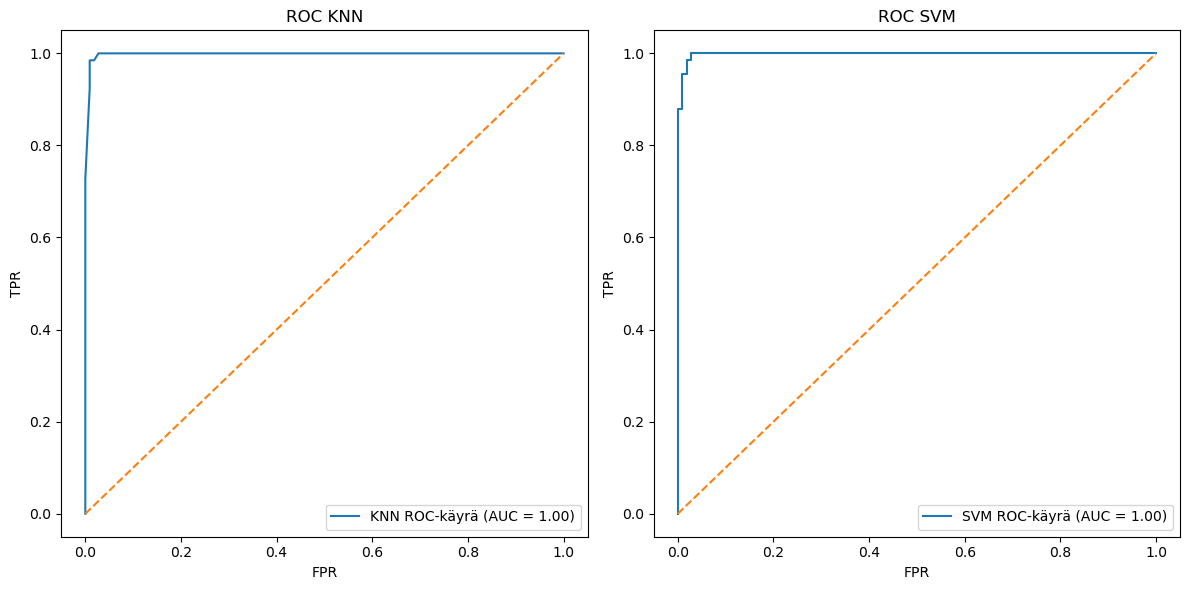

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
# AUC = area under curve
y_scores_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn, pos_label=4)
roc_auc_knn = auc(fpr_knn, tpr_knn)

y_scores_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm, pos_label=4)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(fpr_knn, tpr_knn, label='KNN ROC-käyrä (AUC = %0.2f)' % roc_auc_knn)
ax1.plot([0, 1], [0, 1], linestyle='--')
ax1.set_title('ROC KNN')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend(loc='lower right')

ax2.plot(fpr_svm, tpr_svm, label='SVM ROC-käyrä (AUC = %0.2f)' % roc_auc_svm)
ax2.plot([0, 1], [0, 1], linestyle='--')
ax2.set_title('ROC SVM')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 5, n_estimators=10, random_state=1)
model.fit(X_train, y_train)

print("Test accuracy: %.2f" % model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred)) # compare realized values with predictions
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
for i in range(len(importances)):
     print("feature: %12s - relative importance: %4.1f %%" % (X.columns[i], importances[i] * 100))

Test accuracy: 0.97
[[108   1]
 [  5  61]]
              precision    recall  f1-score   support

           2       0.96      0.99      0.97       109
           4       0.98      0.92      0.95        66

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

feature: clump-thickness - relative importance:  4.9 %
feature: uniformity-of-cell-size - relative importance: 22.0 %
feature: uniformity-of-cell-shape - relative importance: 17.9 %
feature: single-epithelial-cell-size - relative importance:  1.5 %
feature:  bare-nuclei - relative importance: 32.8 %
feature: bland-chromatin - relative importance: 11.1 %
feature: normal-nucleoli - relative importance:  9.8 %


#### Mallien vartailu

**Miksi tuloksia tulkitaan?** Tulosanalyysi on äärimmäisen tärkeää koneoppimisessa. Pelkkä (hyväkään) ratkaisu ei usein sellaisenaan riitä, vaan tulosten merkitys pitää ymmärtää "liiketoiminnan" kannalta.

Vertaa eri menetelmistä saatuja tuloksia.
  * vertaa menetelmien luokittelutuloksien **tarkkuutta** sekä **sekaannusmatriisia** toisiinsa.

Tulkitse tulokset myös sanallisesti.

### Vastaus: Tulosten tulkinta

* TODO: VERTAA MOLEMPIEN MENETELMIEN LUOKITTELUTULOKSIEN TARKKUUTTA SEKÄ SEKAANNUSMATRIISIA TOISIINSA.

Molemmat suoriutuivat suht hyvin. Tein myös RandomForestilla luokittelun että nään feature_importancet. Tähän en sen enempää pureudu, mutta se suoriutui ihan okei. RF laittoi 5kpl luokkan kaksi pistettä virheellisesti luokkaan yksi, mikä oli eniten tekemistäni testeistä. Muistan että viime tehtävässä datan epätasapaino sekoitti luokittelua, ja tässäkin se voisi olla syy miksi luokkaa kaksi(4) sijoitettiin enemmän enemmistöön.

kNN suoriutui hieman paremmin. f1 score oli kNN:ällä molemmilla luokilla 0.01 parempi. Olisin voinut ajatella että SVM olisi voittanut tämän sillä käytimme lineaarista lajittelua ja meillä oli kaksi luokkaa. Tosin tästä voi myös päätellä että jos SVM pärjäsi hyvin, kNN on myös vahvoilla mutta se on hieman "joustavampi"? Lajittelua ei tällöin tehdä niin "tiukasti" erottavan hypertason sekä tukivektoreiden avulla ja lähimpiä naapureita katsoen lajittelu on tarkempaa. Tiivistettynä voisi sanoa että knn on parempi mukautumaan vähänkään monimutkaisempiin päätösrajoihin.


#### ROC-käyrän piirtäminen

ROC-käyrät ovat ylempänä. Molemmissa käyrät ovat nopeasti vasemmassa yläkulmassa. Mitä lähempänä käyrä on vasenta yläkulmaa, sitä tarkemmin malli on onnistunut. SVM kuvassa nähdään vähän enemmän portaikkoa, joka vahvistaa tulkintaamme accuracy_scoresta sekä matriiseista. Jokainen "porras" kuvassa tarkoittaa TPR ja FPR osuuksien muuttumista? Ilmeisesti diagonalisesti kulkeva viiva (kNN pieni osuus) tarkoittaa että malli toimii tässä vaiheessa yhtä hyvin kuin satunnainen arvailu. 